# Market Basket Analysis

## Importing Libraries:

In [42]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from IPython.core.interactiveshell import InteractiveShell

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
from google.colab import drive

drive.mount('/content/drive')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


## Importing Dataset

In [5]:
groceries = pd.read_csv('/content/drive/My Drive/Groceries_dataset.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## EDA:

In [6]:
groceries.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(38765, 3)

In [7]:
groceries.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [8]:
# Get all the transactions as a list of lists
all_transactions = [transaction[1]['itemDescription'].tolist() for transaction in list(groceries.groupby(['Member_number', 'Date']))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# First 21st transactions in the transactional dataset
len(all_transactions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


14963

## Data Preparation

We need to transform the data into the following format, which is suitable to perform our association rules.  


# 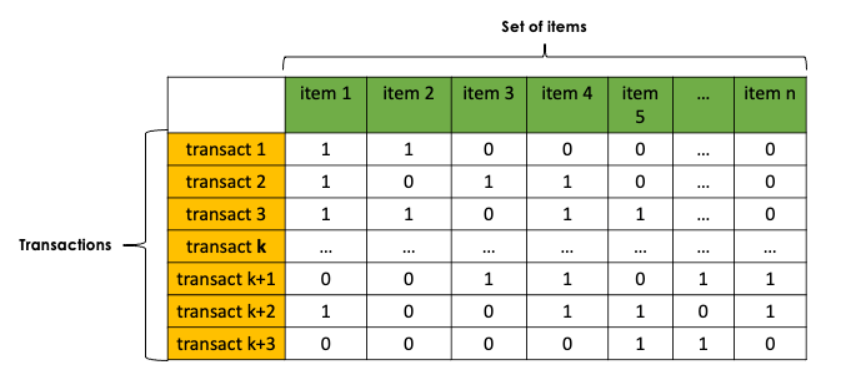

In [11]:
# Look at the 10 first transactions
all_transactions[0:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

The Ones and Zeros in the matrix are boolean values, they could also be respectively replaced by True and False, where:
* **True** means that the item exists in the transaction   
* **False** means it does not  

In [12]:
# The following instructions transform the dataset into the required format
trans_encoder = TransactionEncoder() # Instanciate the encoder
trans_encoder_matrix = trans_encoder.fit(all_transactions).transform(all_transactions)
trans_encoder_matrix = pd.DataFrame(trans_encoder_matrix, columns=trans_encoder.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
trans_encoder_matrix.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Association Rules Implementation

* **support** tells how popular an item is based on the proportion of all transactions that are included. The popularity is met if it corresponds to the user-specified support thresold. For instance, a support threshold set to 0.2 (20%) means that the user wants all the items that occur together in at least 20% of all transactions.  
* A High support thresold does not give much more item combination, so reducing the value might be helpful to see much more item combinations for marketing purpose.

### Helper Functions

In [14]:
def perform_rule_calculation(transact_items_matrix, rule_type="fpgrowth", min_support=0.001):
    """
    desc: this function performs the association rule calculation
    @params:
        - transact_items_matrix: the transaction X Items matrix
        - rule_type:
                    - apriori or Growth algorithms (default="fpgrowth")

        - min_support: minimum support threshold value (default = 0.001)

    @returns:
        - the matrix containing 3 columns:
            - support: support values for each combination of items
            - itemsets: the combination of items
            - number_of_items: the number of items in each combination of items

        - the excution time for the corresponding algorithm

    """
    start_time = 0
    total_execution = 0

    if(not rule_type=="fpgrowth"):
        start_time = time.time()
        rule_items = apriori(transact_items_matrix,
                       min_support=min_support,
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Apriori!")

    else:
        start_time = time.time()
        rule_items = fpgrowth(transact_items_matrix,
                       min_support=min_support,
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Fp Growth!")

    rule_items['number_of_items'] = rule_items['itemsets'].apply(lambda x: len(x))

    return rule_items, total_execution


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
def compute_association_rule(rule_matrix, metric="lift", min_thresh=1):
    """
    @desc: Compute the final association rule
    @params:
        - rule_matrix: the corresponding algorithms matrix
        - metric: the metric to be used (default is lift)
        - min_thresh: the minimum threshold (default is 1)

    @returns:
        - rules: all the information for each transaction satisfying the given metric & threshold
    """
    rules = association_rules(rule_matrix,
                              metric=metric,
                              min_threshold=min_thresh)

    return rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# Plot Lift Vs Coverage(confidence)
def plot_metrics_relationship(rule_matrix, col1, col2):
    """
    desc: shows the relationship between the two input columns
    @params:
        - rule_matrix: the matrix containing the result of a rule (apriori or Fp Growth)
        - col1: first column
        - col2: second column
    """
    fit = np.polyfit(rule_matrix[col1], rule_matrix[col2], 1)
    fit_funt = np.poly1d(fit)
    plt.plot(rule_matrix[col1], rule_matrix[col2], 'yo', rule_matrix[col1],
    fit_funt(rule_matrix[col1]))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('{} vs {}'.format(col1, col2))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
def compare_time_exec(algo1=list, alg2=list):
    """
    @desc: shows the execution time between two algorithms
    @params:
        - algo1: list containing the description of first algorithm, where

        - algo2: list containing the description of second algorithm, where
    """

    execution_times = [algo1[1], algo2[1]]
    algo_names = (algo1[0], algo2[0])
    y=np.arange(len(algo_names))

    plt.bar(y,execution_times,color=['orange', 'blue'])
    plt.xticks(y,algo_names)
    plt.xlabel('Algorithms')
    plt.ylabel('Time')
    plt.title("Execution Time (seconds) Comparison")
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
val = {'name':12}
value = list(val.items())[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
value

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


('name', 12)

## **Using Fp Growph Algorithm**

### Sample Size : 20%

In [36]:
# Set the seed for reproducibility (optional)
seed_value = 42
np.random.seed(seed_value)

# Create a new DataFrame with 20% sample size
sample_size = 0.2
trans_encoder_sampled_20 = trans_encoder_matrix.sample(frac=sample_size, random_state=seed_value)

# Print the first few rows of the sampled DataFrame
print(trans_encoder_sampled_20.head())

       Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
12669                  False     False             False             False   
5369                   False     False             False             False   
3059                   False     False             False             False   
9755                   False     False             False             False   
14300                  False     False             False             False   

       baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
12669           False  False          False             False  False    False   
5369            False  False          False             False  False    False   
3059            False  False          False             False  False    False   
9755            False  False          False             False  False    False   
14300           False  False          False             False  False    False   

       ...  turkey  vinegar  waffles  whippe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [121]:
fpgrowth_matrix, fp_growth_exec_time_20 = perform_rule_calculation(trans_encoder_sampled_20) # Run the algorithm
print("Fp Growth execution took: {} seconds".format(fp_growth_exec_time_20))

Computed Fp Growth!
Fp Growth execution took: 0.10614347457885742 seconds


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
fpgrowth_matrix.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,number_of_items
0,0.157923,(whole milk),1
1,0.085879,(yogurt),1
2,0.060349,(sausage),1
3,0.009490,(semi-finished bread),1
4,0.051728,(pastry),1


In [22]:
fpgrowth_matrix.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,number_of_items
745,0.001403,"(yogurt, chewing gum)",2
746,0.001069,"(other vegetables, chewing gum)",2
747,0.001002,"(chewing gum, soda)",2
748,0.001069,"(pasta, whole milk)",2
749,0.001002,"(rolls/buns, seasonal products)",2


### interpreting the results:

**High Support Values:**

If an itemset has a high support value, it means that the combination of items occurs frequently in the dataset. These high-support itemsets are often considered more reliable associations.

**Association Rules:**

You can derive association rules from the itemsets. For example, if you have an itemset {A, B, C}, you can create rules like A and B imply C. The rules are derived based on the confidence and lift measures.

**Size of Itemsets:**

Pay attention to the number of items in each itemset. Smaller itemsets may represent strong associations between a few items, while larger itemsets may capture more complex relationships.

**Rule Confidence and Lift:**

Once you have identified frequent itemsets, you can generate association rules with confidence and lift measures. Confidence indicates the probability of the consequent given the antecedent, while lift measures how much more likely the consequent is given the antecedent compared to its individual probability.

### Lift

In [43]:
fp_growth_rule_lift = compute_association_rule(fpgrowth_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
fp_growth_rule_lift.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(frankfurter),(citrus fruit),0.042432,0.056465,0.004009,0.094488,1.673391,0.001613,1.041991,0.420243
1,(citrus fruit),(frankfurter),0.056465,0.042432,0.004009,0.071006,1.673391,0.001613,1.030758,0.426493
2,(frankfurter),(bottled water),0.042432,0.057133,0.002673,0.062992,1.102546,0.000249,1.006253,0.097130
3,(bottled water),(frankfurter),0.057133,0.042432,0.002673,0.046784,1.102546,0.000249,1.004565,0.098645
4,(frankfurter),(bottled beer),0.042432,0.043769,0.002339,0.055118,1.259302,0.000482,1.012011,0.215033


### Analysis:

1. **`antecedents` and `consequents`:**
   - These columns represent the sets of items involved in each association rule. For example, the first row indicates an association rule where "frankfurter" is the antecedent, and "citrus fruit" is the consequent.

2. **`antecedent support` and `consequent support`:**
   - These columns show the support values for the antecedent and consequent, respectively. Support measures the proportion of transactions that contain the corresponding item or itemset.

3. **`support`:**
   - This column represents the support value for the entire rule, i.e., the proportion of transactions that contain both the antecedent and the consequent.

4. **`confidence`:**
   - Confidence measures the probability of the occurrence of the consequent given the antecedent. It is calculated as support for the antecedent and consequent divided by the support for the antecedent.

5. **`lift`:**
   - Lift measures how much more likely the antecedent and consequent are to occur together compared to if they were independent. It is calculated as (support for antecedent and consequent) / (support for antecedent * support for consequent).

6. **`leverage`:**
   - Leverage measures the difference between the observed frequency of the antecedent and consequent occurring together and what would be expected if they were independent.

7. **`conviction`:**
   - Conviction is a measure of how much the consequent relies on the antecedent. A high conviction value indicates that the consequent is highly dependent on the antecedent.

8. **`zhangs_metric`:**
   - Zhang's metric is another measure of association between items in a rule.

Now, let's interpret one of the rows:

- **Example Row:**
   - Antecedents: "frankfurter"
   - Consequents: "citrus fruit"
   - Support: 0.004009
   - Confidence: 0.094488
   - Lift: 1.673391
   - Leverage: 0.001613
   - Conviction: 1.041991
   - Zhang's Metric: 0.420243

   Interpretation:
   - The rule suggests that if a transaction contains "frankfurter," there's a 4.009% chance it will also contain "citrus fruit."
   - The confidence of 9.4488% indicates that 9.4488% of transactions containing "frankfurter" also contain "citrus fruit."
   - The lift of 1.673391 suggests that "citrus fruit" is 1.673391 times more likely to be bought when "frankfurter" is bought compared to its individual likelihood.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


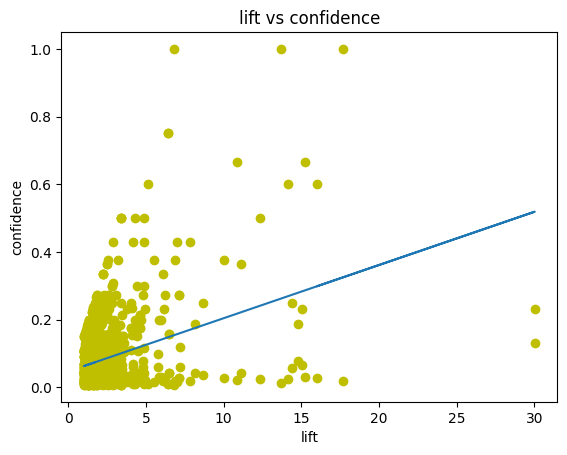

In [50]:
plot_metrics_relationship(fp_growth_rule_lift, col1='lift', col2='confidence')

### Confidence
the goal is to identify and analyze association rules with a confidence level of at least 0.2 using the FP-Growth algorithm.

In [51]:
fp_growth_rule = compute_association_rule(fpgrowth_matrix, metric="confidence", min_thresh=0.2)
fp_growth_rule.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(frankfurter, yogurt)",(citrus fruit),0.003675,0.056465,0.001002,0.272727,4.830016,0.000795,1.297361,0.795886
1,"(frankfurter, citrus fruit)",(yogurt),0.004009,0.088206,0.001002,0.250000,2.834280,0.000649,1.215726,0.649782
2,"(frankfurter, sausage)",(soda),0.002005,0.102907,0.001002,0.500000,4.858766,0.000796,1.794186,0.795782
3,"(frankfurter, soda)",(sausage),0.004343,0.061477,0.001002,0.230769,3.753763,0.000735,1.220080,0.736801
4,"(frankfurter, rolls/buns)",(whole milk),0.004009,0.147344,0.001336,0.333333,2.262283,0.000746,1.278984,0.560215


the goal is to identify and analyze association rules with a confidence level of at least 0.4 using the FP-Growth algorithm.

In [52]:
fp_growth_rule = compute_association_rule(fpgrowth_matrix, metric="confidence", min_thresh=0.4)
fp_growth_rule.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(frankfurter, sausage)",(soda),0.002005,0.102907,0.001002,0.500000,4.858766,0.000796,1.794186,0.795782
1,"(frankfurter, candy)",(citrus fruit),0.001002,0.056465,0.001002,1.000000,17.710059,0.000946,inf,0.944482
2,"(citrus fruit, candy)",(frankfurter),0.001671,0.042432,0.001002,0.600000,14.140157,0.000931,2.393919,0.930834
3,"(butter, sausage)",(bottled beer),0.002005,0.043769,0.001336,0.666667,15.231552,0.001249,2.868694,0.936224
4,"(butter, bottled beer)",(sausage),0.002005,0.061477,0.001336,0.666667,10.844203,0.001213,2.815570,0.909608


### Sample Size : 50%

In [53]:
# Set the seed for reproducibility (optional)
seed_value = 42
np.random.seed(seed_value)

# Create a new DataFrame with 50% sample size
sample_size = 0.5
trans_encoder_sampled_50 = trans_encoder_matrix.sample(frac=sample_size, random_state=seed_value)

# Print the first few rows of the sampled DataFrame
print(trans_encoder_sampled_50.head())

       Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
12669                  False     False             False             False   
5369                   False     False             False             False   
3059                   False     False             False             False   
9755                   False     False             False             False   
14300                  False     False             False             False   

       baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
12669           False  False          False             False  False    False   
5369            False  False          False             False  False    False   
3059            False  False          False             False  False    False   
9755            False  False          False             False  False    False   
14300           False  False          False             False  False    False   

       ...  turkey  vinegar  waffles  whippe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [122]:
fpgrowth_matrix, fp_growth_exec_time_50 = perform_rule_calculation(trans_encoder_sampled_50) # Run the algorithm
print("Fp Growth execution took: {} seconds".format(fp_growth_exec_time_50))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computed Fp Growth!
Fp Growth execution took: 0.32078051567077637 seconds


In [59]:
fpgrowth_matrix.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,number_of_items
0,0.158514,(whole milk),1
1,0.109596,(rolls/buns),1
2,0.070837,(root vegetables),1
3,0.001738,(nut snack),1
4,0.041700,(whipped/sour cream),1


In [60]:
fpgrowth_matrix.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,number_of_items
736,0.001069,"(frozen dessert, whole milk)",2
737,0.001069,"(pasta, yogurt)",2
738,0.001069,"(herbs, yogurt)",2
739,0.001337,"(herbs, whole milk)",2
740,0.001069,"(pickled vegetables, whole milk)",2


### Lift

In [61]:
fp_growth_rule_lift = compute_association_rule(fpgrowth_matrix)

fp_growth_rule_lift.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whipped/sour cream),(pip fruit),0.041700,0.046645,0.002005,0.048077,1.030692,0.000060,1.001504,0.031074
1,(pip fruit),(whipped/sour cream),0.046645,0.041700,0.002005,0.042980,1.030692,0.000060,1.001337,0.031235
2,(frankfurter),(citrus fruit),0.039428,0.056536,0.002807,0.071186,1.259142,0.000578,1.015774,0.214256
3,(citrus fruit),(frankfurter),0.056536,0.039428,0.002807,0.049645,1.259142,0.000578,1.010751,0.218141
4,(frankfurter),(pip fruit),0.039428,0.046645,0.002272,0.057627,1.235433,0.000433,1.011653,0.198389


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


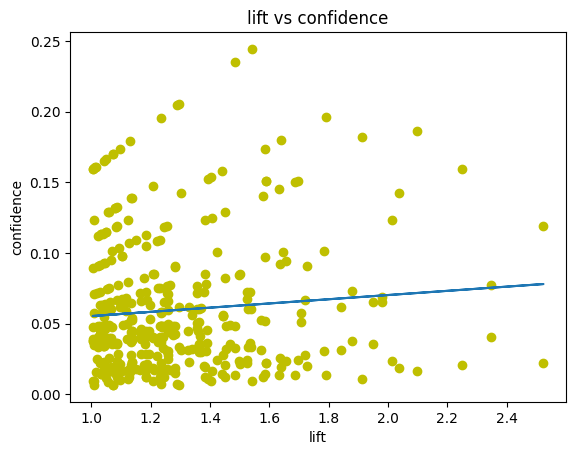

In [62]:
plot_metrics_relationship(fp_growth_rule_lift, col1='lift', col2='confidence')


### Confidence

In [63]:
fp_growth_rule = compute_association_rule(fpgrowth_matrix, metric="confidence", min_thresh=0.2)
fp_growth_rule.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(rolls/buns, yogurt)",(whole milk),0.009088,0.158514,0.002138,0.235294,1.484377,0.000698,1.100405,0.329309
1,"(sausage, yogurt)",(whole milk),0.006014,0.158514,0.001470,0.244444,1.542102,0.000517,1.113732,0.353662
2,(spread cheese),(whole milk),0.005881,0.158514,0.001203,0.204545,1.290396,0.000271,1.057868,0.226375
3,"(yogurt, tropical fruit)",(whole milk),0.005213,0.158514,0.001069,0.205128,1.294072,0.000243,1.058644,0.228436


In [66]:
fp_growth_rule = compute_association_rule(fpgrowth_matrix, metric="confidence", min_thresh=0.15)
fp_growth_rule.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(cat food),(whole milk),0.011227,0.158514,0.001871,0.166667,1.051433,0.000092,1.009783,0.049473
1,(fruit/vegetable juice),(whole milk),0.033681,0.158514,0.005079,0.150794,0.951297,-0.000260,0.990909,-0.050315
2,(candy),(whole milk),0.015771,0.158514,0.002539,0.161017,1.015792,0.000039,1.002984,0.015795
3,(oil),(soda),0.014167,0.095028,0.002138,0.150943,1.588409,0.000792,1.065856,0.375763
4,(seasonal products),(rolls/buns),0.006950,0.109596,0.001069,0.153846,1.403752,0.000308,1.052295,0.289637


### Sample Size : 80%

In [67]:
# Set the seed for reproducibility (optional)
seed_value = 42
np.random.seed(seed_value)

# Create a new DataFrame with 80% sample size
sample_size = 0.8
trans_encoder_sampled_80 = trans_encoder_matrix.sample(frac=sample_size, random_state=seed_value)

# Print the first few rows of the sampled DataFrame
print(trans_encoder_sampled_80.head())

       Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
12669                  False     False             False             False   
5369                   False     False             False             False   
3059                   False     False             False             False   
9755                   False     False             False             False   
14300                  False     False             False             False   

       baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
12669           False  False          False             False  False    False   
5369            False  False          False             False  False    False   
3059            False  False          False             False  False    False   
9755            False  False          False             False  False    False   
14300           False  False          False             False  False    False   

       ...  turkey  vinegar  waffles  whippe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:
fpgrowth_matrix, fp_growth_exec_time_80 = perform_rule_calculation(trans_encoder_sampled_80) # Run the algorithm
print("Fp Growth execution took: {} seconds".format(fp_growth_exec_time_80))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computed Fp Growth!
Fp Growth execution took: 0.5899908542633057 seconds


In [82]:
fpgrowth_matrix.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,number_of_items
0,0.158062,(whole milk),1
1,0.109357,(rolls/buns),1
2,0.070677,(root vegetables),1
3,0.001420,(nut snack),1
4,0.042941,(whipped/sour cream),1


In [83]:
fpgrowth_matrix.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,number_of_items
763,0.001003,"(pasta, whole milk)",2
764,0.001003,"(herbs, other vegetables)",2
765,0.001086,"(herbs, yogurt)",2
766,0.001170,"(herbs, whole milk)",2
767,0.001170,"(pickled vegetables, whole milk)",2


### Lift

In [84]:
fp_growth_rule_lift = compute_association_rule(fpgrowth_matrix)

fp_growth_rule_lift.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(frankfurter),(other vegetables),0.039181,0.122139,0.005180,0.132196,1.082345,0.000394,1.011590,0.079182
1,(other vegetables),(frankfurter),0.122139,0.039181,0.005180,0.042408,1.082345,0.000394,1.003369,0.086665
2,(brown bread),(pastry),0.037427,0.051295,0.002005,0.053571,1.044381,0.000085,1.002405,0.044147
3,(pastry),(brown bread),0.051295,0.037427,0.002005,0.039088,1.044381,0.000085,1.001729,0.044793
4,(frankfurter),(brown bread),0.039181,0.037427,0.001587,0.040512,1.082423,0.000121,1.003215,0.079252


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


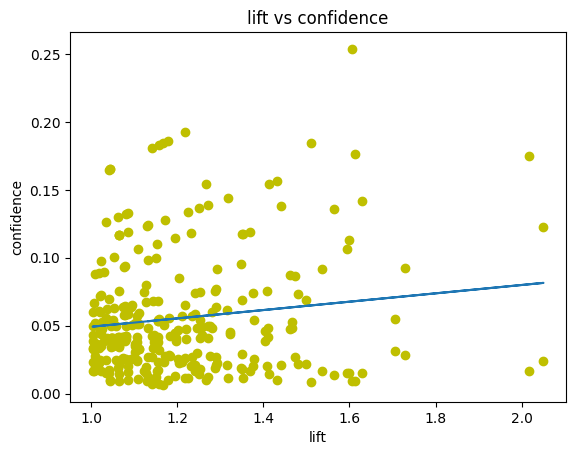

In [85]:
plot_metrics_relationship(fp_growth_rule_lift, col1='lift', col2='confidence')


### Sample Size : 100%

In [75]:
# Set the seed for reproducibility (optional)
seed_value = 42
np.random.seed(seed_value)

# Create a new DataFrame with 100% sample size
sample_size = 1
trans_encoder_sampled_100 = trans_encoder_matrix.sample(frac=sample_size, random_state=seed_value)

# Print the first few rows of the sampled DataFrame
print(trans_encoder_sampled_100.head())

       Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
12669                  False     False             False             False   
5369                   False     False             False             False   
3059                   False     False             False             False   
9755                   False     False             False             False   
14300                  False     False             False             False   

       baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
12669           False  False          False             False  False    False   
5369            False  False          False             False  False    False   
3059            False  False          False             False  False    False   
9755            False  False          False             False  False    False   
14300           False  False          False             False  False    False   

       ...  turkey  vinegar  waffles  whippe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:
fpgrowth_matrix, fp_growth_exec_time_100 = perform_rule_calculation(trans_encoder_sampled_100) # Run the algorithm
print("Fp Growth execution took: {} seconds".format(fp_growth_exec_time_100))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computed Fp Growth!
Fp Growth execution took: 0.5794949531555176 seconds


In [77]:
fpgrowth_matrix.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,number_of_items
0,0.157923,(whole milk),1
1,0.110005,(rolls/buns),1
2,0.069572,(root vegetables),1
3,0.001470,(nut snack),1
4,0.043708,(whipped/sour cream),1


In [78]:
fpgrowth_matrix.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,number_of_items
745,0.001069,"(pasta, whole milk)",2
746,0.001136,"(herbs, yogurt)",2
747,0.001136,"(herbs, whole milk)",2
748,0.001002,"(pickled vegetables, whole milk)",2
749,0.001069,"(whole milk, frozen fish)",2


### Lift

In [79]:
fp_growth_rule_lift = compute_association_rule(fpgrowth_matrix)

fp_growth_rule_lift.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
1,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
2,(tropical fruit),(cat food),0.067767,0.011829,0.001002,0.014793,1.250543,0.000201,1.003008,0.214911
3,(cat food),(tropical fruit),0.011829,0.067767,0.001002,0.084746,1.250543,0.000201,1.018551,0.202746
4,(brown bread),(pastry),0.037626,0.051728,0.002005,0.053286,1.030127,0.000059,1.001646,0.030389


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


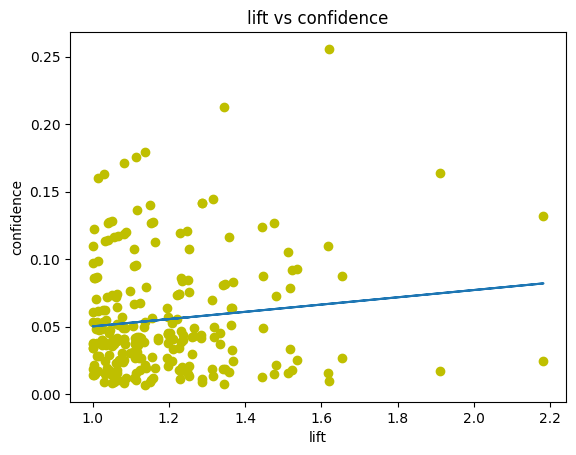

In [80]:
plot_metrics_relationship(fp_growth_rule_lift, col1='lift', col2='confidence')


### Confidence

In [86]:
fp_growth_rule = compute_association_rule(fpgrowth_matrix, metric="confidence", min_thresh=0.2)
fp_growth_rule.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(sausage, yogurt)",(whole milk),0.005597,0.158062,0.00142,0.253731,1.605266,0.000535,1.128197,0.379173


In [87]:
fp_growth_rule = compute_association_rule(fpgrowth_matrix, metric="confidence", min_thresh=0.15)
fp_growth_rule.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(candy),(whole milk),0.014703,0.158062,0.002423,0.164773,1.042457,0.000099,1.008035,0.041336
1,(seasonal products),(rolls/buns),0.006934,0.109357,0.001086,0.156627,1.432253,0.000328,1.056048,0.303907
2,"(rolls/buns, soda)",(other vegetables),0.008104,0.122139,0.001253,0.154639,1.266095,0.000263,1.038446,0.211887
3,(grapes),(whole milk),0.014536,0.158062,0.002256,0.155172,0.981720,-0.000042,0.996580,-0.018545
4,"(yogurt, soda)",(whole milk),0.005931,0.158062,0.001086,0.183099,1.158399,0.000149,1.030648,0.137555


## **Using Apriori Algorithm**

### Sample size : 20%

In [125]:
apriori_matrix, apriori_exec_time_20 = perform_rule_calculation(trans_encoder_sampled_20, rule_type="apriori")
print("Apriori Execution took: {} seconds".format(apriori_exec_time_20))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computed Apriori!
Apriori Execution took: 1.0187361240386963 seconds


In [91]:
apriori_matrix.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,number_of_items
0,0.004343,(Instant food products),1
1,0.020047,(UHT-milk),1
2,0.002673,(abrasive cleaner),1
3,0.002673,(artif. sweetener),1
4,0.005680,(baking powder),1


In [92]:
apriori_matrix.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,number_of_items
940,0.001671,"(rolls/buns, whole milk, yogurt)",3
941,0.001002,"(sausage, root vegetables, whole milk)",3
942,0.001002,"(whipped/sour cream, root vegetables, waffles)",3
943,0.001336,"(sausage, yogurt, whole milk)",3
944,0.001002,"(yogurt, whole milk, soda)",3


### Lift  

In [93]:
apriori_rule_lift = compute_association_rule(apriori_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
apriori_rule_lift.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(pip fruit),(Instant food products),0.046442,0.004343,0.001002,0.021583,4.969009,0.000801,1.017620,0.837655
1,(Instant food products),(pip fruit),0.004343,0.046442,0.001002,0.230769,4.969009,0.000801,1.239626,0.802237
2,(whole milk),(Instant food products),0.147344,0.004343,0.001002,0.006803,1.566196,0.000362,1.002476,0.423981
3,(Instant food products),(whole milk),0.004343,0.147344,0.001002,0.230769,1.566196,0.000362,1.108453,0.363087
4,(bottled beer),(UHT-milk),0.043769,0.020047,0.001002,0.022901,1.142366,0.000125,1.002921,0.130328


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


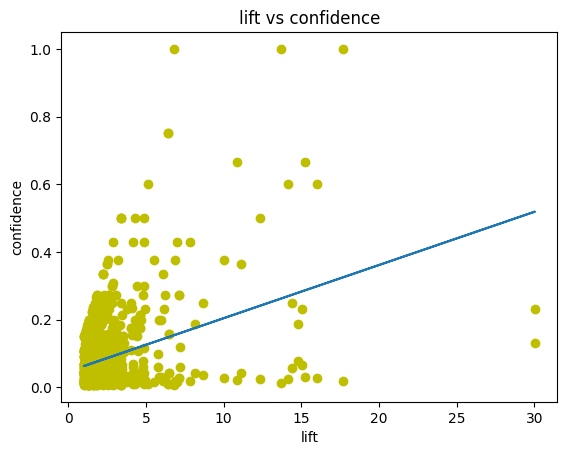

In [95]:
plot_metrics_relationship(apriori_rule_lift, col1='lift', col2='confidence')

### Confidence

In [96]:
apripri_rule = compute_association_rule(apriori_matrix, metric="confidence", min_thresh=0.2)
apripri_rule.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Instant food products),(pip fruit),0.004343,0.046442,0.001002,0.230769,4.969009,0.000801,1.239626,0.802237
1,(Instant food products),(whole milk),0.004343,0.147344,0.001002,0.230769,1.566196,0.000362,1.108453,0.363087
2,(baking powder),(bottled water),0.005680,0.057133,0.001336,0.235294,4.118335,0.001012,1.232980,0.761509
3,(cake bar),(sausage),0.004678,0.061477,0.001002,0.214286,3.485637,0.000715,1.194484,0.716460
4,(cake bar),(shopping bags),0.004678,0.046108,0.001002,0.214286,4.647516,0.000787,1.214045,0.788520


In [97]:
apripri_rule = compute_association_rule(apriori_matrix, metric="confidence", min_thresh=0.4)
apripri_rule.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(cream),(newspapers),0.001671,0.037421,0.001002,0.600000,16.033929,0.000940,2.406448,0.939201
1,(rum),(sausage),0.002339,0.061477,0.001002,0.428571,6.971273,0.000859,1.642416,0.858562
2,"(beef, other vegetables)",(soda),0.002339,0.102907,0.001002,0.428571,4.164657,0.000762,1.569913,0.761666
3,"(beef, soda)",(other vegetables),0.002005,0.117274,0.001002,0.500000,4.263533,0.000767,1.765453,0.766990
4,"(butter, sausage)",(bottled beer),0.002005,0.043769,0.001336,0.666667,15.231552,0.001249,2.868694,0.936224


### Sample Size : 50%

In [126]:
apriori_matrix, apriori_exec_time_50 = perform_rule_calculation(trans_encoder_sampled_50, rule_type="apriori")
print("Apriori Execution took: {} seconds".format(apriori_exec_time_50))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computed Apriori!
Apriori Execution took: 1.2805633544921875 seconds


In [100]:
apriori_matrix.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,number_of_items
0,0.004411,(Instant food products),1
1,0.022053,(UHT-milk),1
2,0.002138,(abrasive cleaner),1
3,0.002272,(artif. sweetener),1
4,0.007217,(baking powder),1


In [101]:
apriori_matrix.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,number_of_items
736,0.001069,"(rolls/buns, whole milk, soda)",3
737,0.002138,"(rolls/buns, whole milk, yogurt)",3
738,0.001470,"(sausage, yogurt, whole milk)",3
739,0.001069,"(yogurt, whole milk, soda)",3
740,0.001069,"(yogurt, tropical fruit, whole milk)",3


### Lift

In [102]:
apriori_rule_lift = compute_association_rule(apriori_matrix)

apriori_rule_lift.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(UHT-milk),0.044507,0.022053,0.001337,0.030030,1.361725,0.000355,1.008224,0.278011
1,(UHT-milk),(bottled beer),0.022053,0.044507,0.001337,0.060606,1.361725,0.000355,1.017138,0.271628
2,(frankfurter),(UHT-milk),0.039428,0.022053,0.001337,0.033898,1.537134,0.000467,1.012261,0.363782
3,(UHT-milk),(frankfurter),0.022053,0.039428,0.001337,0.060606,1.537134,0.000467,1.022544,0.357319
4,(sausage),(UHT-milk),0.061347,0.022053,0.001470,0.023965,1.086710,0.000117,1.001959,0.085006


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


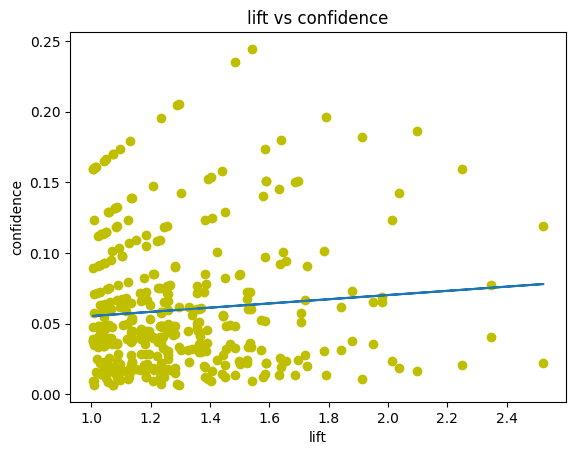

In [103]:
plot_metrics_relationship(apriori_rule_lift, col1='lift', col2='confidence')


### Confidence


In [104]:
apripri_rule = compute_association_rule(apriori_matrix, metric="confidence", min_thresh=0.2)
apripri_rule.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(spread cheese),(whole milk),0.005881,0.158514,0.001203,0.204545,1.290396,0.000271,1.057868,0.226375
1,"(rolls/buns, yogurt)",(whole milk),0.009088,0.158514,0.002138,0.235294,1.484377,0.000698,1.100405,0.329309
2,"(sausage, yogurt)",(whole milk),0.006014,0.158514,0.001470,0.244444,1.542102,0.000517,1.113732,0.353662
3,"(yogurt, tropical fruit)",(whole milk),0.005213,0.158514,0.001069,0.205128,1.294072,0.000243,1.058644,0.228436


In [106]:
apripri_rule = compute_association_rule(apriori_matrix, metric="confidence", min_thresh=0.15)
apripri_rule.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(candy),(whole milk),0.015771,0.158514,0.002539,0.161017,1.015792,0.000039,1.002984,0.015795
1,(cat food),(whole milk),0.011227,0.158514,0.001871,0.166667,1.051433,0.000092,1.009783,0.049473
2,(chocolate),(whole milk),0.024325,0.158514,0.003742,0.153846,0.970554,-0.000114,0.994484,-0.030158
3,(condensed milk),(whole milk),0.006282,0.158514,0.001069,0.170213,1.073804,0.000073,1.014099,0.069166
4,(detergent),(whole milk),0.008019,0.158514,0.001203,0.150000,0.946290,-0.000068,0.989984,-0.054121


### Sample Size : 80%

In [127]:
apriori_matrix, apriori_exec_time_80 = perform_rule_calculation(trans_encoder_sampled_80, rule_type="apriori")
print("Apriori Execution took: {} seconds".format(apriori_exec_time_80))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computed Apriori!
Apriori Execution took: 4.373556852340698 seconds


In [108]:
apriori_matrix.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,number_of_items
0,0.004177,(Instant food products),1
1,0.021303,(UHT-milk),1
2,0.001504,(abrasive cleaner),1
3,0.002005,(artif. sweetener),1
4,0.007352,(baking powder),1


In [109]:
apriori_matrix.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,number_of_items
763,0.001253,"(other vegetables, yogurt, whole milk)",3
764,0.001003,"(sausage, rolls/buns, whole milk)",3
765,0.001587,"(rolls/buns, whole milk, yogurt)",3
766,0.001420,"(sausage, yogurt, whole milk)",3
767,0.001086,"(yogurt, whole milk, soda)",3


### Lift

In [110]:
apriori_rule_lift = compute_association_rule(apriori_matrix)

apriori_rule_lift.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(UHT-milk),0.046032,0.021303,0.001086,0.023593,1.107505,0.000105,1.002346,0.101753
1,(UHT-milk),(bottled beer),0.021303,0.046032,0.001086,0.050980,1.107505,0.000105,1.005214,0.099183
2,(frankfurter),(UHT-milk),0.039181,0.021303,0.001003,0.025586,1.201054,0.000168,1.004396,0.174224
3,(UHT-milk),(frankfurter),0.021303,0.039181,0.001003,0.047059,1.201054,0.000168,1.008267,0.171041
4,(brown bread),(beef),0.037427,0.034252,0.001420,0.037946,1.107851,0.000138,1.003840,0.101136


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


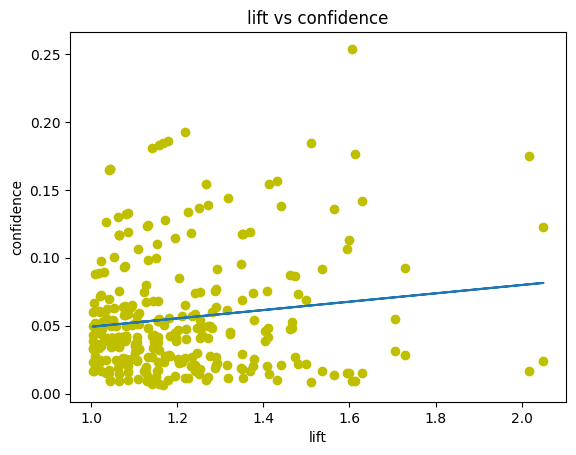

In [111]:
plot_metrics_relationship(apriori_rule_lift, col1='lift', col2='confidence')


### Confidence

In [112]:
apripri_rule = compute_association_rule(apriori_matrix, metric="confidence", min_thresh=0.2)
apripri_rule.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(sausage, yogurt)",(whole milk),0.005597,0.158062,0.00142,0.253731,1.605266,0.000535,1.128197,0.379173


In [113]:
apripri_rule = compute_association_rule(apriori_matrix, metric="confidence", min_thresh=0.15)
apripri_rule.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.046032,0.158062,0.007268,0.157895,0.998943,-0.000008,0.999802,-0.001108
1,(candy),(whole milk),0.014703,0.158062,0.002423,0.164773,1.042457,0.000099,1.008035,0.041336
2,(chewing gum),(whole milk),0.011947,0.158062,0.001838,0.153846,0.973329,-0.000050,0.995018,-0.026985
3,(condensed milk),(whole milk),0.006015,0.158062,0.001086,0.180556,1.142310,0.000135,1.027450,0.125335
4,(detergent),(whole milk),0.008605,0.158062,0.001420,0.165049,1.044202,0.000060,1.008368,0.042699


### Sample Size : 100%

In [128]:
apriori_matrix, apriori_exec_time_100 = perform_rule_calculation(trans_encoder_sampled_100, rule_type="apriori")
print("Apriori Execution took: {} seconds".format(apriori_exec_time_100))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computed Apriori!
Apriori Execution took: 2.9995524883270264 seconds


In [116]:
apriori_matrix.head()

apriori_matrix.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,number_of_items
0,0.004010,(Instant food products),1
1,0.021386,(UHT-milk),1
2,0.001470,(abrasive cleaner),1
3,0.001938,(artif. sweetener),1
4,0.008087,(baking powder),1


,support,itemsets,number_of_items
745,0.001136,"(sausage, rolls/buns, whole milk)",3
746,0.001002,"(rolls/buns, whole milk, soda)",3
747,0.001337,"(rolls/buns, whole milk, yogurt)",3
748,0.001069,"(sausage, whole milk, soda)",3
749,0.001470,"(sausage, yogurt, whole milk)",3


### Lift

In [117]:
apriori_rule_lift = compute_association_rule(apriori_matrix)

apriori_rule_lift.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(tropical fruit),(UHT-milk),0.067767,0.021386,0.001537,0.022682,1.060617,8.785064e-05,1.001326,0.061307
1,(UHT-milk),(tropical fruit),0.021386,0.067767,0.001537,0.071875,1.060617,8.785064e-05,1.004426,0.058402
2,(brown bread),(beef),0.037626,0.033950,0.001537,0.040853,1.203301,2.597018e-04,1.007196,0.175559
3,(beef),(brown bread),0.033950,0.037626,0.001537,0.045276,1.203301,2.597018e-04,1.008012,0.174891
4,(citrus fruit),(beef),0.053131,0.033950,0.001804,0.033962,1.000349,6.297697e-07,1.000012,0.000369


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


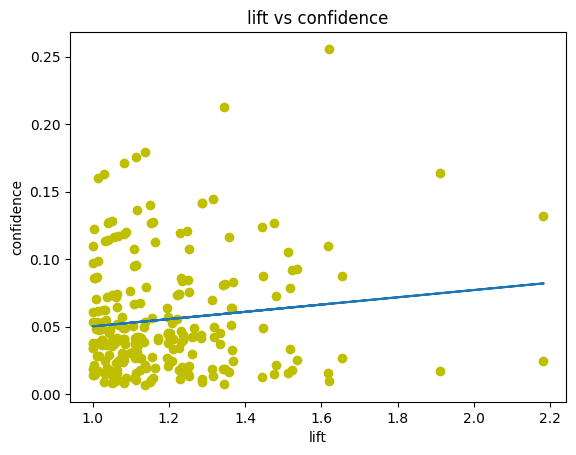

In [118]:
plot_metrics_relationship(apriori_rule_lift, col1='lift', col2='confidence')


### Confidence

In [119]:
apripri_rule = compute_association_rule(apriori_matrix, metric="confidence", min_thresh=0.2)
apripri_rule.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(sausage, rolls/buns)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304,0.258214
1,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,0.384877


In [120]:
apripri_rule = compute_association_rule(apriori_matrix, metric="confidence", min_thresh=0.15)
apripri_rule.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
1,(detergent),(whole milk),0.008621,0.157923,0.001403,0.162791,1.030824,0.000042,1.005814,0.030162
2,(frozen fish),(whole milk),0.006817,0.157923,0.001069,0.156863,0.993287,-0.000007,0.998743,-0.006759
3,(ham),(whole milk),0.017109,0.157923,0.002740,0.160156,1.014142,0.000038,1.002659,0.014188
4,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,0.000172,1.022008,0.103985


# Comparative Analysis

Based on the previous experiences, we can perform the following analyzis    
## Time execution    

### Sample Size : 20%

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


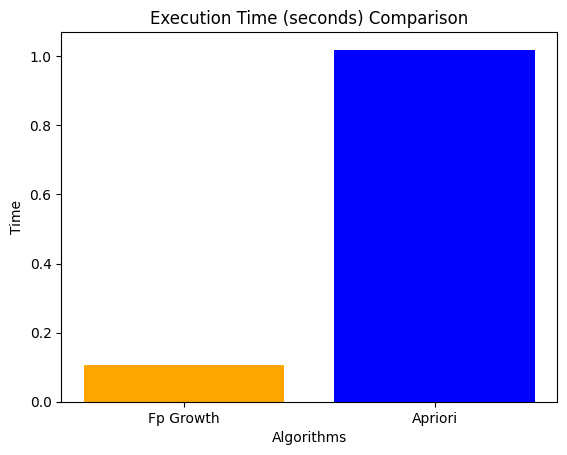

In [129]:
algo1 = ['Fp Growth', fp_growth_exec_time_20]
algo2 = ['Apriori', apriori_exec_time_20]

compare_time_exec(algo1, algo2)

### Sample Size : 50%

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


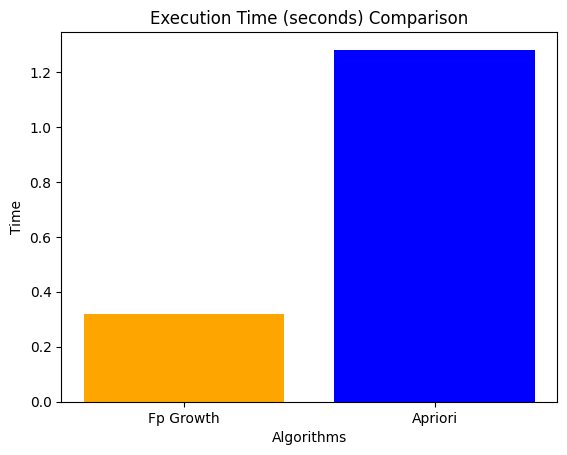

In [130]:
algo1 = ['Fp Growth', fp_growth_exec_time_50]
algo2 = ['Apriori', apriori_exec_time_50]

compare_time_exec(algo1, algo2)

### Sample Size : 80%

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


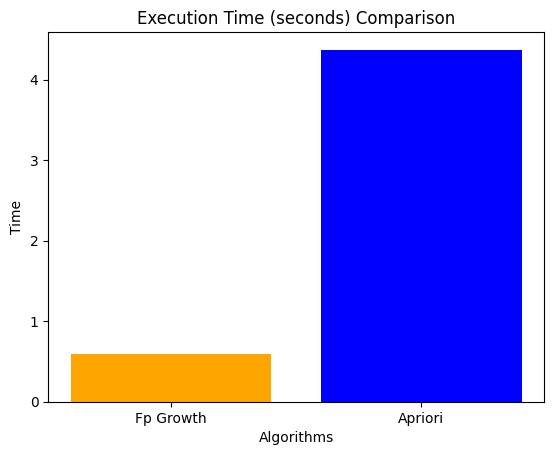

In [131]:
algo1 = ['Fp Growth', fp_growth_exec_time_80]
algo2 = ['Apriori', apriori_exec_time_80]

compare_time_exec(algo1, algo2)

### Sample Size : 100%

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


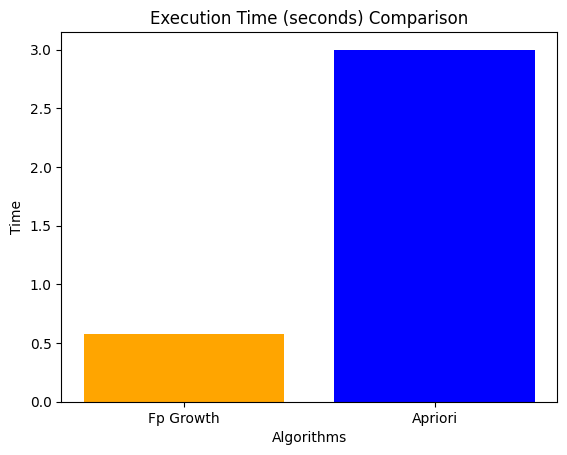

In [132]:
algo1 = ['Fp Growth', fp_growth_exec_time_100]
algo2 = ['Apriori', apriori_exec_time_100]

compare_time_exec(algo1, algo2)